In [279]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from pandas_profiling import ProfileReport   #for showing interactive report

In [280]:
#load dataset
titan = pd.read_csv("train.csv")

In [281]:
#top 5 rows
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [282]:
titan.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#columns description
pclass-Ticket class-1 = 1st, 2 = 2nd, 3 = 3rd
survival-Survival-0 = No, 1 = Yes
embarked-Port of Embarkation-C = Cherbourg, Q = Queenstown, S = Southampton
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch # of parents / children aboard the Titanic
ticket	Ticket number
fare-Passenger fare	
cabin-Cabin number

In [283]:
#statistical summary
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [284]:
#shape of the data
titan.shape

(891, 12)

In [285]:
#columns name
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [286]:
#checking datatypes
titan.dtypes
#here we can see that survived columns and pclass column in int types so we convert into categorical datatype

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [287]:
#checking null values
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can see that in titan dataset we have three columns which is having null values.
Age columns having 177 20% null values  
Cabin column having 687 null values which is more than 50% so we need to dropout this column
Emabarked column having 2 null values

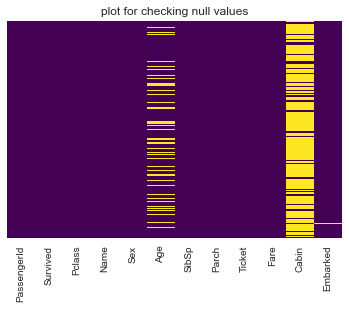

In [288]:
#for checking null values in visualize way
plt.title("plot for checking null values")
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap="viridis");

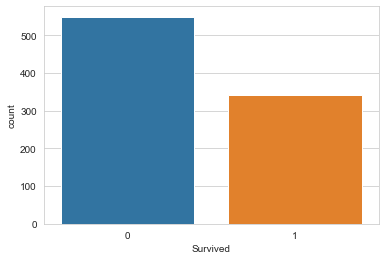

In [289]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=titan);
#we can see that more number of person which is not survived 
# survived column-0 not survived ,1-survived

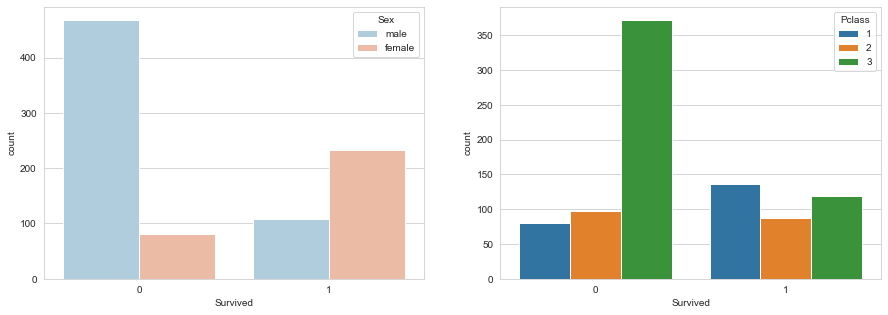

In [290]:
#count plot for survived column with sex and pclass column 
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="Survived",hue="Sex",data=titan,palette="RdBu_r",ax=axis1); 
sns.countplot(x="Survived",hue="Pclass",data=titan,ax=axis2);

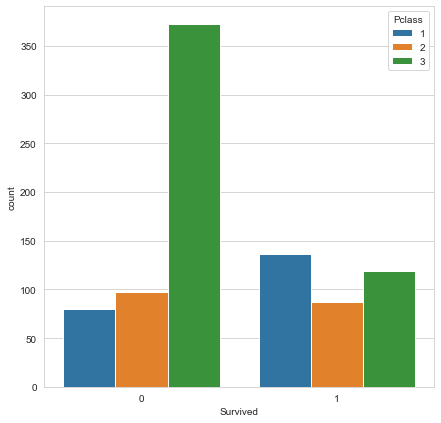

In [291]:
plt.figure(figsize=(7,7))
sns.countplot(x="Survived",hue="Pclass",data=titan);

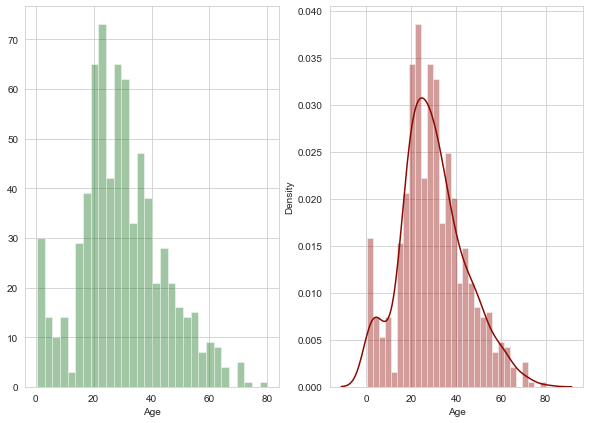

In [292]:
sns.set_color_codes("dark")
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("count plot for age")
sns.distplot(titan["Age"].dropna(),kde=False,bins=30,color="g");
plt.subplot(1,2,2)
plt.title("count plot for age with kde esitmator")
sns.distplot(titan["Age"].dropna(),kde=True,bins=30,color="r");

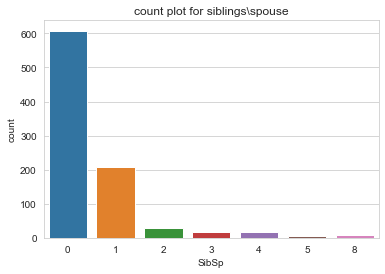

In [293]:
plt.title("count plot for siblings\spouse")
sns.countplot(x="SibSp",data=titan);

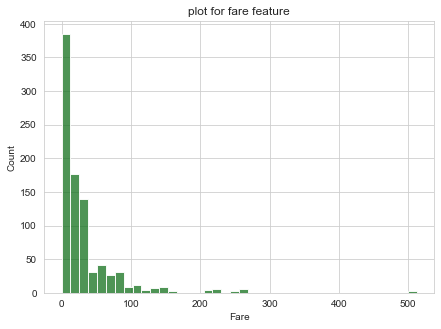

In [294]:
plt.figure(figsize=(7,5))
plt.title("plot for fare feature")
sns.histplot(x="Fare",data=titan,color="g",bins=40);

#Data Cleaning
here we want to fill in missing age data instead of just dropping the missing age we can impute with mean. and another way we can do we check average age by passenger class.

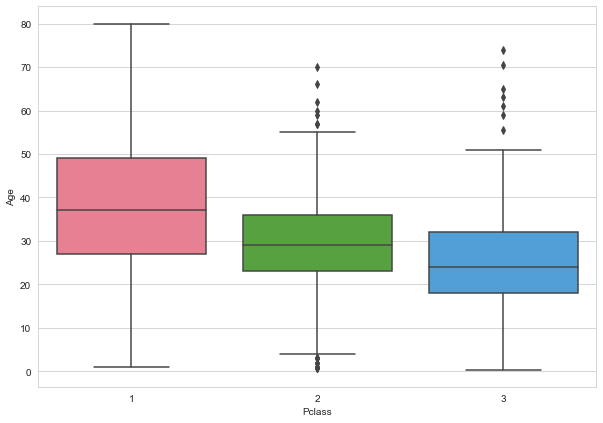

In [295]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=titan,palette="husl");

In [296]:
#we create one function for imputting null values with mean age with diff pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [297]:
#impute nul values with mean
titan["Age"] = titan[["Age","Pclass"]].apply(impute_age,axis=1)

In [298]:
#cheking null values
titan.Age.isnull().sum()

0

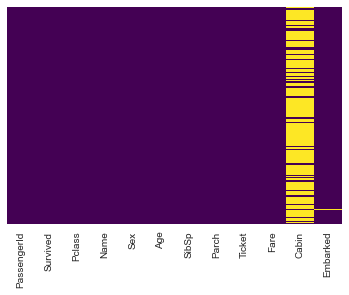

In [299]:
#removing null values from age column we can check by plot 
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap="viridis");

In [300]:
#checking null values in embarked column
titan.Embarked.isnull().sum()

2

In [301]:
#we can see that in embarked column most frequent value is s
titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [302]:
#null values impute with "S"
titan['Embarked'].fillna('S',inplace=True)

In [303]:
#we know that in Cabin column more than 50% of the data value is null 
#so we dropout this column
titan.drop(["Cabin"],inplace=True,axis=1)

In [304]:
#here we can see that we have no null values
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [305]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [306]:
## create dummy variables for sex and embarked column
Sex_dummies = pd.get_dummies(titan.Sex,drop_first=True,prefix="Sex")
Embark_dummies = pd.get_dummies(titan.Embarked,drop_first=True,prefix="Embarked")

In [307]:
#concat the columns,Sex_dummies,Embark_dummies
titan = pd.concat([titan,Embark_dummies,Sex_dummies],axis=1)

In [308]:
#drop useless columns
titan.drop(['PassengerId','Name','Sex','Embarked','Ticket'],inplace=True,axis=1)

In [309]:
#after completing all preprocessing
titan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [310]:
#checking null values
titan.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

In [311]:
#complete overview of dataset
titan.profile_report()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


In [312]:
#change data types into category
#titan["Survived"]=titan["Survived"].astype("category")
#titan["Pclass"]=titan["Pclass"].astype("category")
#titan["SibSp"]=titan["SibSp"].astype("category")
#titan["Parch"]=titan["Parch"].astype("category")


In [313]:
#-------Thankyou--------
